In [12]:
#stat method for univariate data
#using sd method
import numpy as np
import matplotlib.pyplot as plt
data=np.random.normal(size=1000)
data[-5:] = [3.5,3.6,4,3.56,4.2]

In [13]:
from scipy.stats import zscore,iqr
data[np.abs(zscore(data))>3]

array([3.21728712, 3.5       , 3.6       , 4.        , 3.56      ,
       4.2       ])

In [14]:
#using iqr method

data=np.random.normal(size=1000)
data[-5:]=[-2,9,11,-3,-21]

In [15]:
iqr_value=iqr(data)
lower_threshold=np.percentile(data,25)-iqr_value*1.5
upper_threshold=np.percentile(data,75)+iqr_value*1.5

In [16]:
data[np.where(data<lower_threshold)]

array([ -2.79128134,  -2.87489946,  -3.5326749 ,  -2.88697845,
        -2.99874368,  -3.        , -21.        ])

In [17]:
data[np.where(data>upper_threshold)]

array([ 2.83894625,  3.5832472 ,  2.80381175,  3.15628733,  2.83186897,
        9.        , 11.        ])

In [19]:
#using guassian mixture models
# Number of samples per component
n_samples = 500

# Generate random sample, two components
np.random.seed(0)
C = np.array([[0., -0.1], [1.7, .4]])
C2 = np.array([[1., -0.1], [2.7, .2]])
#X = np.r_[np.dot(np.random.randn(n_samples, 2), C)]
          #.7 * np.random.randn(n_samples, 2) + np.array([-6, 3])]
X = np.r_[np.dot(np.random.randn(n_samples, 2), C),np.dot(np.random.randn(n_samples, 2), C2)]
X[-5:] = [[4,-1],[4.1,-1.1],[3.9,-1],[4.0,-1.2],[4.0,-1.3]]

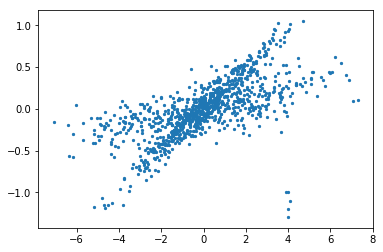

In [20]:
plt.scatter(X[:,0], X[:,1],s=5)

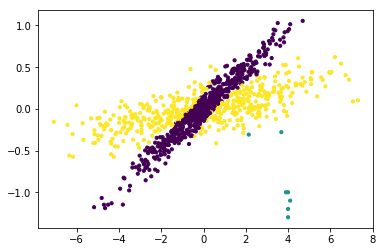

In [27]:
from sklearn.mixture import GaussianMixture
gmm=GaussianMixture(n_components=3)
gmm.fit(X)
pred=gmm.predict(X)
plt.scatter(X[:,0], X[:,1],s=10,c=pred)

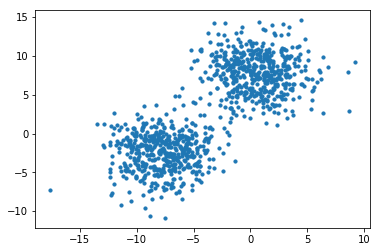

In [29]:

#Fitting elliptical envelope
from sklearn.datasets import make_blobs
X,_ = make_blobs(n_features=2, centers=2, cluster_std=2.5, n_samples=1000)
plt.scatter(X[:,0],X[:,1],s=10)

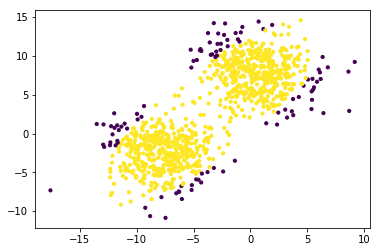

In [30]:
from sklearn.covariance import EllipticEnvelope

ev = EllipticEnvelope(contamination=.1)
ev.fit(X)
cluster = ev.predict(X)
plt.scatter(X[:,0], X[:,1],s=10,c=cluster)

In [31]:
#isolation forest
rng = np.random.RandomState(42)

# Generate train data
X = 0.3 * rng.randn(100, 2)
X_train = np.r_[X + 2, X - 2]
# Generate some regular novel observations
X = 0.3 * rng.randn(20, 2)
X_test = np.r_[X + 2, X - 2]
# Generate some abnormal novel observations
X_outliers = rng.uniform(low=-4, high=4, size=(20, 2))

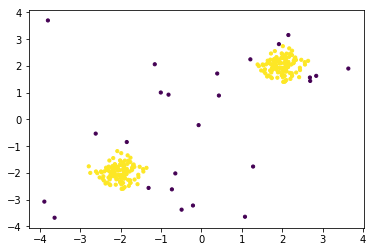

In [37]:
from sklearn.ensemble import IsolationForest
data=np.r_[X_train,X_test,X_outliers]
iso=IsolationForest(behaviour='new',contamination='auto')
iso.fit(data)
pred=iso.predict(data)
plt.scatter(data[:,0], data[:,1],s=10,c=pred)

In [40]:
#local outlier factor
from sklearn.neighbors import LocalOutlierFactor
lof=LocalOutlierFactor(n_neighbors=25,contamination=0.1)
pred = lof.fit_predict(data)

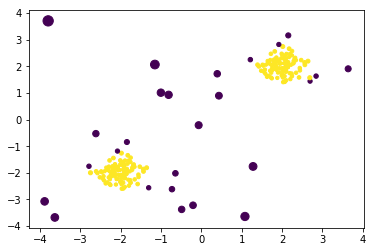

In [44]:
s=np.abs(lof.negative_outlier_factor_)
plt.scatter(data[:,0],data[:,1],s=s*10,c=pred)

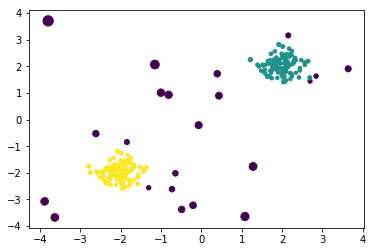

In [50]:
#db scan
from sklearn.cluster import DBSCAN
dbscan=DBSCAN(eps=0.3)
dbscan.fit(data)
plt.scatter(data[:,0],data[:,1],s=s*10,c=dbscan.labels_)